<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 10</h1>
<h1>BACK PROPAGATION</h1>
</center>

<br/>
<hr/>
<br/>

<center>

<a href="https://www.quantamagazine.org/brain-bursts-can-mimic-famous-ai-learning-strategy-20211018/"><img width="80%" style="float:left" src="https://d2r55xnwy6nx47.cloudfront.net/uploads/2021/10/branbackprop_2880x1620_lede.jpg"></a>

<center>

<br/>
<hr/>
<br/>

## Imports

In [ ]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
%matplotlib inline
!pip3 install netgraph
from netgraph import Graph
!pip install fdeb
from fdeb import fdeb
import matplotlib.collections as collections

## Reading Data

In [ ]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')

In [ ]:
# river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv', index_col = 0)
# river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina', 'North Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

## Plotting Data

In [ ]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

In [ ]:
# plot_data(X, y, title='Click to zoom')

# # plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

# plt.legend(['Georgia and North Carolina (y=0)', 'South Carolina (y=1)'], fontsize=50, markerscale=4);

# Normalize data

In [ ]:
X = X.apply(lambda x: (x-x.mean()) / x.std())
# X[0] = 1  #Done in the methods of Neural Network now

<br/>
<hr/>
<br/>

## Question 1.

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set.


In [ ]:
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

# plot_data(X_train, y_train, "Training set");
# plt.figure();
# plot_data(X_test, y_test, "Test set");

<br/>
<hr/>
<br/>

In [ ]:
y.value_counts()

state_name
0    1239
1     394
Name: count, dtype: int64

# Question 2.

Implement the **Backpropagation** algorithm to learn a complex decision boundary that decides if a given city is in South Carolina or not.

<br/>

<b>Use as many hidden layers as you like. Each of your hidden layers can have any number of neurons. </b>

<br/>
<!-- <img width="80%" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/backprop_2layers.png"> -->
<!--
Your code should take as **inputs**:

1. Data $~(\mathbf{X}$, $\mathbf{y}$)

  * where $\mathbf{X}_i$ represents (Longitude, Latitude) of $i^{th}$ city
  * $\mathbf{y}_i$ is $1$ if state of $i^{th}$ city is South Carolina and $0$ otherwise

2. Learning rate $~\alpha$
3. Max iterations $~\text{epoch}$

and returns as **output**:

* A matrix of weights $\mathbf{W}$ of dimensions ($\text{epoch} \times 3) $ where value $\mathbf{W}_{i, j}$ represents weight $w_j$ at epoch $i$.

    * That is, `len(weights) == epoch` _and_ `len(weights[0]) == 3`
\  -->

ONLY USE <u>TRAIN SET</u> FOR LEARNING!

In [ ]:
# from numpy.random import random, randint

# def tanh(x):
#     return np.tanh(x)

# def tanh_deriv(x):
#     return 1.0 - x**2

# class NeuralNetwork:

#     def __init__(self, layers):

#         self.activation_func = tanh
#         self.activation_deriv = tanh_deriv

#         self.weights = []
#         for i in range(1, len(layers) - 1):
#             r = random((layers[i-1] + 1, layers[i] + 1)) -1
#             self.weights.append(r)
#         r = 2 * random( (layers[i] + 1, layers[i+1])) - 1
#         self.weights.append(r)

#     def backprop(self, X, y, learning_rate=0.2, epochs=100000):

#         ones = np.atleast_2d(np.ones(X.shape[0]))
#         X = np.concatenate((ones.T, X), axis=1)    #Appending bias: all 1s for x_0

#         errors = []
#         Ws = []

#         for k in tqdm(range(epochs)):
#             i = randint(X.shape[0])      #Stochastic
#             activs = [X[i]]

#             for l in range(len(self.weights)):
#               dot_value = np.dot(activs[l], self.weights[l])
#               activ = self.activation_func(dot_value)
#               activs.append(activ)

#             error = y[i] - activs[-1]
#             deltas = [error * self.activation_deriv(activs[-1])]

#             for l in range(len(activs) - 2, 0, -1):
#               deltas.append(deltas[-1].dot(self.weights[l].T) * \
#                             self.activation_deriv(activs[l]))

#             deltas.reverse()

#             for i in range(len(self.weights)):
#               layer = np.atleast_2d(activs[i])
#               delta = np.atleast_2d(deltas[i])
#               self.weights[i] += learning_rate * np.dot(layer.T, delta)
#               Ws.append(self.weights)

#             errors.append(error[0]**2)

#         return errors, Ws

#     def forward(self, x):
#         a = np.concatenate((np.ones(1).T, np.array(x)))
#         for l in range(0, len(self.weights)):
#             a = self.activation_func(np.dot(a, self.weights[l]))
#         return a


# nn = NeuralNetwork([2,2,10, 1])
# train_cities = list(set(X.sample(frac=0.75).index))
# test_cities  = list(set(X.index).difference(train_cities))

# X_train, y_train = X.loc[train_cities], y.loc[train_cities]
# X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]
# errors, Ws = nn.backprop(X_train, y_train)

# preds = X_test.apply(nn.forward, axis=1)
# preds = preds.apply(lambda x: round(x[0]))

# print("Accuracy: ", sum(preds == y_test)/len(y_test))

# # err = [np.mean(errors[i*1000: (i+1)*1000]) for i in range(int(len(errors)/1000))];
# # plt.plot(err);
# # plt.xlabel('epoch');
# # plt.ylabel('MSE');

# # plt.figure();
# # plt.scatter(X_test['lng'], X_test['lat'], c=preds);
# # plt.legend(['Predicted NOT SC', 'not SC']);

# # plt.figure();
# # plt.scatter(X_test['lng'], X_test['lat'], c=preds==y_test);
# # plt.legend(['Correct Prediction']);

In [ ]:
# Ws[-1][1][0]

<br/>
<hr/>
<br/>

In [ ]:
# import networkx as nx


# # Of Note:  if you the NN is made with tensor Flow, i and z must increment by zero, else 1
# weights = Ws[-1]
# # Create a directed graph
# G = nx.DiGraph()

# pos = {}
# # Add nodes for first column
# col = 0
# i = 0
# z = 0
# maxRows = 0
# for z in range(len(weights)):
#   maxRows = max(maxRows, weights[z].shape[0], weights[z].shape[1])
#   z += 1

# maxRows += 1

# while i < len(weights): #gets weights associated with the a column
#   w = weights[i]
#   for sourceRow in range(w.shape[0]): # gets weights associated with a node
#     source_node = 'l_' + str(sourceRow) + '_' + str(col)
#     rowVals = maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5
#     if source_node not in pos.keys():
#       pos[source_node] = (col, rowVals)

#     for row in range(w.shape[1]):
#       dest_node = 'l_' + str(row) + '_' + str(col+1)
#       rowVals = maxRows//(w.shape[1] + 1) * (row + 1) * -5
#       G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
#       pos[dest_node] = (col + 1, rowVals)

#   i += 1
#   col += 1

In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx

# plt.figure(figsize=(35, 10))  # Adjusted figure size

# # Adjusted node size and other parameters
# nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

# # Customize edge labels
# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# plt.title('States Neural Network')  # Improved title

# # Enable interactive mode for zooming and panning
# plt.axis('on')  # Ensure the axis is on for interactive zooming
# plt.margins(0.1)  # Add margins to the plot for better visibility

# plt.show()


In [ ]:
# """XOR Problem"""
# nn = NeuralNetwork([2,2,1])
# X = np.array([[0, 0],
#               [0, 1],
#               [1, 0],
#               [1, 1]])å
# y = np.array([0, 1, 1, 0])
# errs, Ws = nn.backprop(X, y)
# preds = pd.DataFrame(X).apply(nn.forward, axis=1)

In [ ]:
# import networkx as nx


# # Of Note:  if you the NN is made with tensor Flow, i and z must increment by zero, else 1
# weights = Ws[-1]
# # Create a directed graph
# G = nx.DiGraph()

# pos = {}
# # Add nodes for first column
# col = 0
# i = 0
# z = 0
# maxRows = 0
# for z in range(len(weights)):
#   maxRows = max(maxRows, weights[z].shape[0], weights[z].shape[1])
#   z += 1

# maxRows += 1

# while i < len(weights): #gets weights associated with the a column
#   w = weights[i]
#   for sourceRow in range(w.shape[0]): # gets weights associated with a node
#     source_node = 'l_' + str(sourceRow) + '_' + str(col)
#     rowVals = maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5
#     if source_node not in pos.keys():
#       pos[source_node] = (col, rowVals)

#     for row in range(w.shape[1]):
#       dest_node = 'l_' + str(row) + '_' + str(col+1)
#       rowVals = maxRows//(w.shape[1] + 1) * (row + 1) * -5
#       G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
#       pos[dest_node] = (col + 1, rowVals)

#   i += 1
#   col += 1

In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx

# plt.figure(figsize=(35, 10))  # Adjusted figure size

# # Adjusted node size and other parameters
# nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

# # Customize edge labels
# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# plt.title('XOR Neural Network')  # Improved title

# # Enable interactive mode for zooming and panning
# plt.axis('on')  # Ensure the axis is on for interactive zooming
# plt.margins(0.1)  # Add margins to the plot for better visibility

# plt.show()


In [ ]:

# nx.draw_networkx_edges(G, pos = pos, width = 2.75);
# nx.draw_networkx_nodes(G, pos = pos, node_size = 1000);
# nx.draw_networkx_labels(G, pos = pos);
# plt.title("Dynamic years spring graph");

In [ ]:
train_cities = list(set(X.sample(frac=0.60).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

import tensorflow as tf
model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(2,1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# predictions = probability_model.predict(X_test)

Epoch 1/150
31/31 [==============================] - 2s 5ms/step - loss: 0.5858 - accuracy: 0.7551
Epoch 2/150
31/31 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7551
Epoch 3/150
31/31 [==============================] - 0s 7ms/step - loss: 0.5580 - accuracy: 0.7551
Epoch 4/150
31/31 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7551
Epoch 5/150
31/31 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7551
Epoch 6/150
31/31 [==============================] - 0s 4ms/step - loss: 0.5578 - accuracy: 0.7551
Epoch 7/150
31/31 [==============================] - 0s 8ms/step - loss: 0.5564 - accuracy: 0.7551
Epoch 8/150
31/31 [==============================] - 0s 6ms/step - loss: 0.5558 - accuracy: 0.7551
Epoch 9/150
31/31 [==============================] - 0s 7ms/step - loss: 0.5561 - accuracy: 0.7551
Epoch 10/150
31/31 [==============================] - 0s 5ms/step - loss: 0.5548 - accuracy: 0.7551
Epoch 11/

In [ ]:
import networkx as nx


# Assuming you have Ws defined earlier, and Ws[-1] contains W1 and W2
# Define the weight matrices (taken from Ws[-1])
weights = model.weights
# Create a directed graph
G = nx.DiGraph()

pos = {}
# Add nodes for first column
col = 0
print(len(weights))
i = 0
z = 0
maxRows = 0
for z in range(len(weights)):
  maxRows = max(maxRows, weights[z].shape[0])
  z += 2

maxRows += 1

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    pos[source_node] = (col, maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5)

    for row in range(w.shape[1]):
      dest_node = 'l_' + str(row) + '_' + str(col+1)
      G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
      pos[dest_node] = (col + 1, maxRows//(w.shape[1] + 1) * (row + 1) * -5)

  i += 2
  col += 1

6


### Graphing

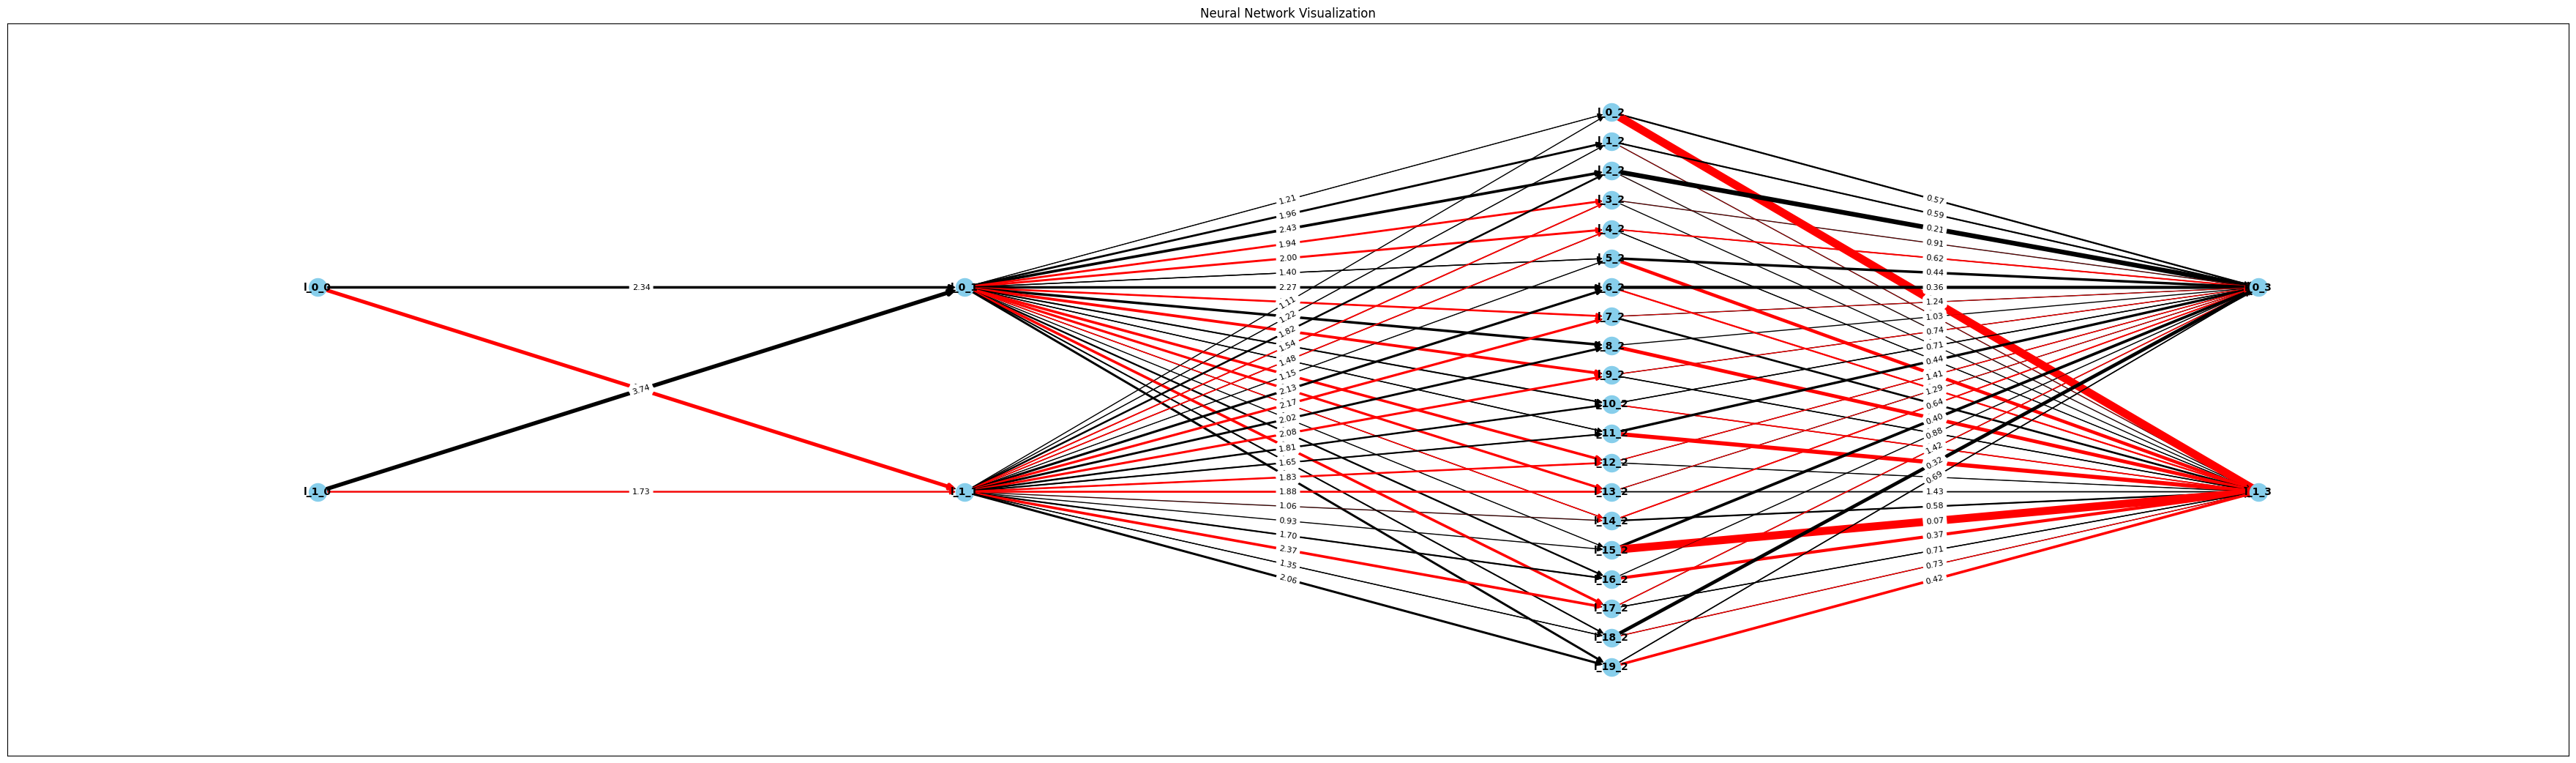

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import math

edge_colors = []
alpha = []
width = []
for u, v, d in G.edges(data=True):
    if d['weight'] > 0:
        edge_colors.append('black')
        value = (d['weight'] **(3/2))
    else:
        d['weight'] *= -1
        edge_colors.append('red')
        value = (d['weight'] **(3/2))
    alpha.append( d['weight'])

    cubed_value = d['weight'] ** 3
    if cubed_value > 0:
        log_of_cubed_value = math.log(cubed_value)  # natural logarithm (base e)
    else:
        cubed_value *= -1
        log_of_cubed_value = math.log(cubed_value)
    width.append(log_of_cubed_value)

plt.figure(figsize=(35, 10))

nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, arrows=True, width = width)


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Neural Network Visualization')

plt.axis('on')
plt.margins(0.1)

plt.show()

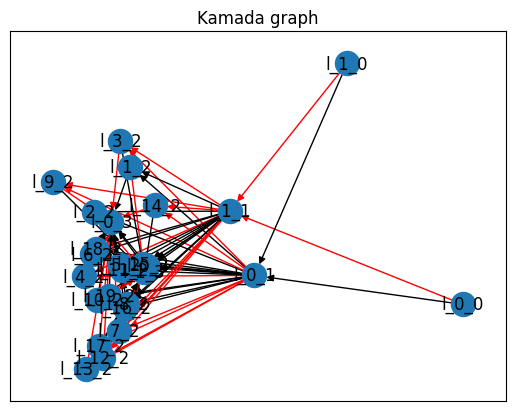

In [ ]:
posKBase = nx.kamada_kawai_layout(G, weight = 'weight')
nx.draw_networkx_edges(G, pos = posKBase, edge_color = edge_colors);
nx.draw_networkx_nodes(G, pos = posKBase);
nx.draw_networkx_labels(G, pos = posKBase);
plt.title("Kamada graph");

In [ ]:
KamadaPos = pd.Series(posKBase)
xVals, yVals = zip(*KamadaPos)
coordsK = pd.DataFrame({
    'xVals' : xVals,
    'yVals' : yVals
})

coordsK.index = list(G.nodes())

from sklearn.decomposition import PCA
import numpy as np

#combines the x and y coordinates into 1 values
pca = PCA(n_components=1)
y_pca = pca.fit_transform(coordsK)
coordsK = pd.DataFrame({
    'coords' : y_pca.flatten()
    })
coordsK.index = list(G.nodes())


In [ ]:
# coordsK['column'] = coordsK.apply(lambda x: print(x.name))
coordsK['column'] = coordsK.apply(lambda x: x.name.split('_')[2], axis = 1)

In [ ]:
coordsK

,coords,column
l_0_0,0.955717,0
l_0_1,0.328313,1
l_1_1,0.283812,1
l_1_0,0.719118,0
l_0_2,0.003363,2
l_1_2,0.000768,2
l_2_2,-0.135119,2
l_3_2,-0.017921,2
l_4_2,-0.197494,2
l_5_2,-0.081921,2


In [ ]:
sorted_groups = coordsK.groupby('column', group_keys=False).apply(lambda x: x.sort_values('coords')) # sorts the nodes by columns and then pca values
sorted_groups['group_index'] = sorted_groups.groupby('column').cumcount() #makes sorted values as group index

NN dynamic layout graph based on Kamada

In [ ]:
import networkx as nx


# Assuming you have Ws defined earlier, and Ws[-1] contains W1 and W2
# Define the weight matrices (taken from Ws[-1])
weights = model.weights
# Create a directed graph
G = nx.DiGraph()

pos = {}
# Add nodes for first column
col = 0
print(len(weights))
i = 0
z = 0

maxRow = sorted_groups['group_index'].max() + 2

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    if source_node not in pos.keys():
      sourceColumn = sorted_groups.loc[source_node]['column']
      colLength = (int(sorted_groups[sorted_groups['column'] \
        == sourceColumn]['group_index'].max()) + 2)
      currRow = (sourceRow + 1)
      pos[source_node] = (col, maxRow//colLength * currRow)

    for row in range(w.shape[1]):
      dest_node = 'l_' + str(row) + '_' + str(col+1)
      G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
      if dest_node not in pos.keys():
        destColumn = sorted_groups.loc[dest_node]['column']
        colLength = (int(sorted_groups[sorted_groups['column'] \
          == destColumn]['group_index'].max()) + 2)
        currRow = sorted_groups.loc[dest_node]['group_index'] + 1
        pos[dest_node] = (col + 1, maxRow//colLength * currRow)

  i += 2
  col += 1

6


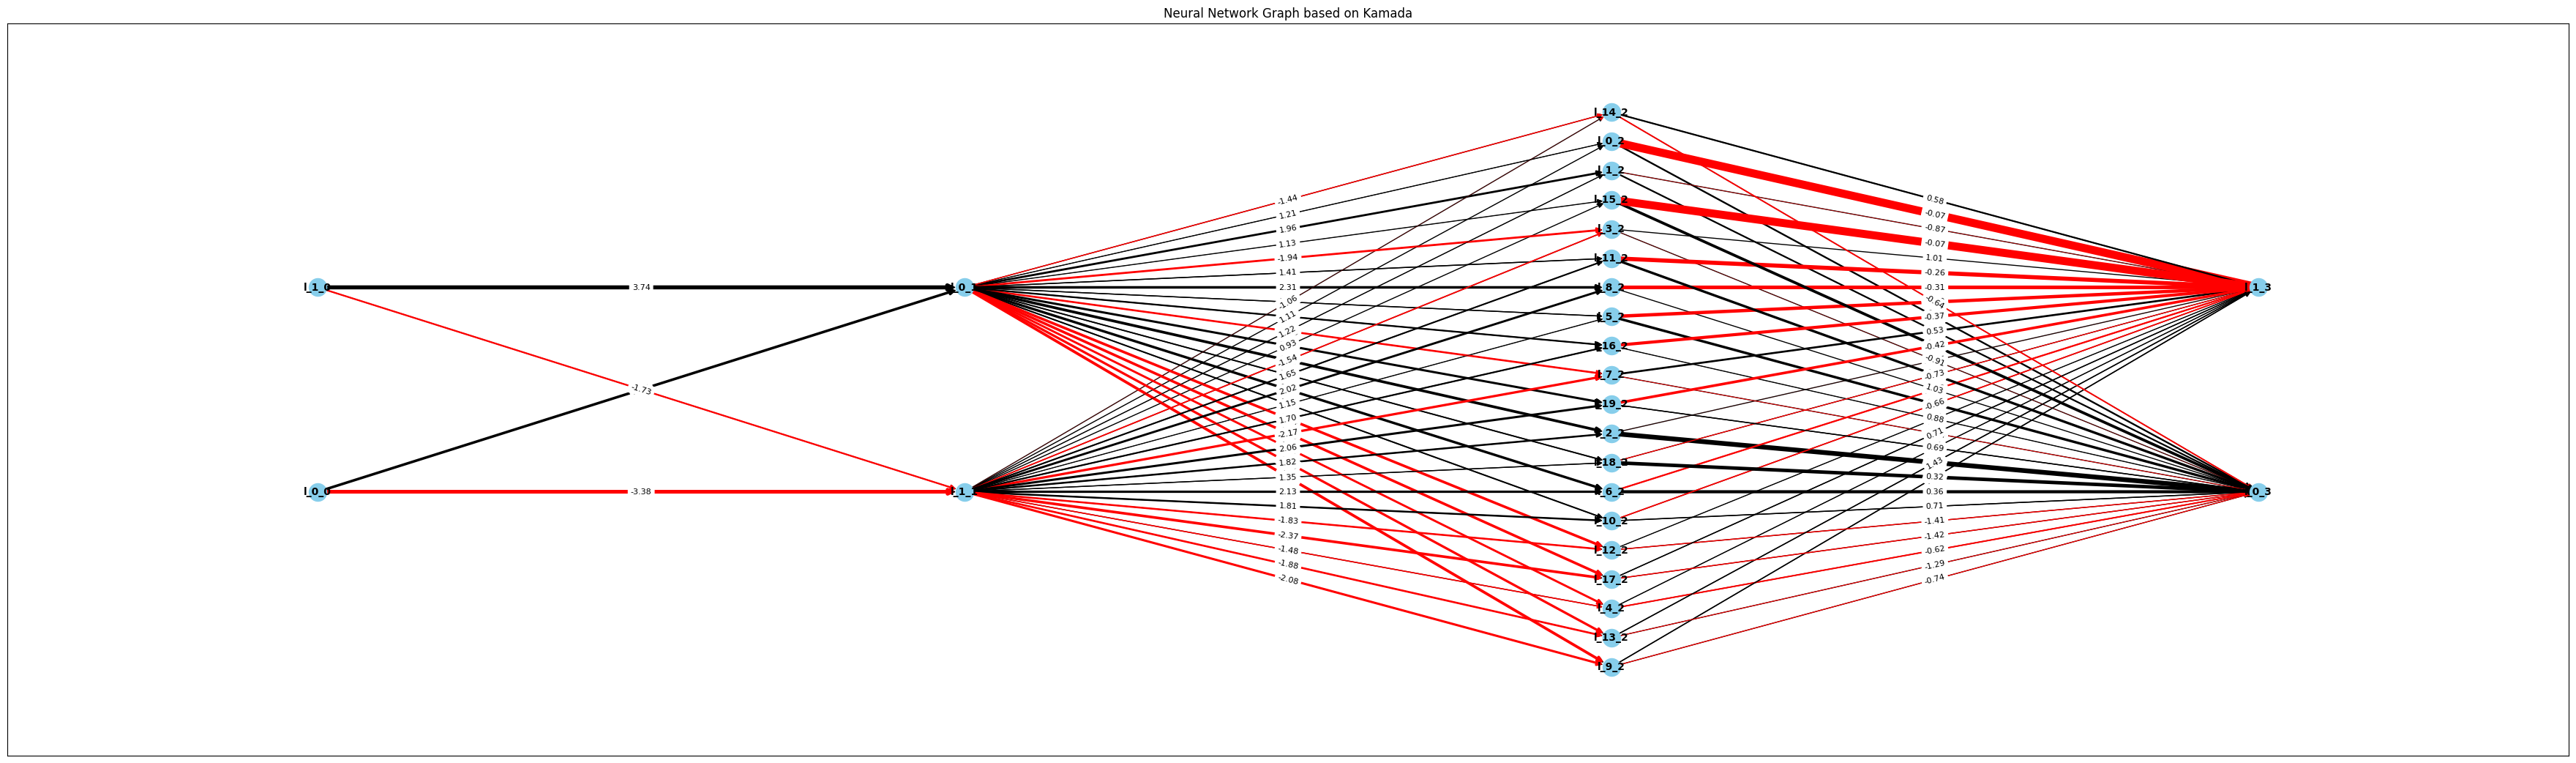

In [ ]:


plt.figure(figsize=(35, 10))

nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, arrows=True, width = width)


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Neural Network Graph based on Kamada')

plt.axis('on')
plt.margins(0.1)

plt.show()

### Force Directed Edge Bundling (FDEB) attempt

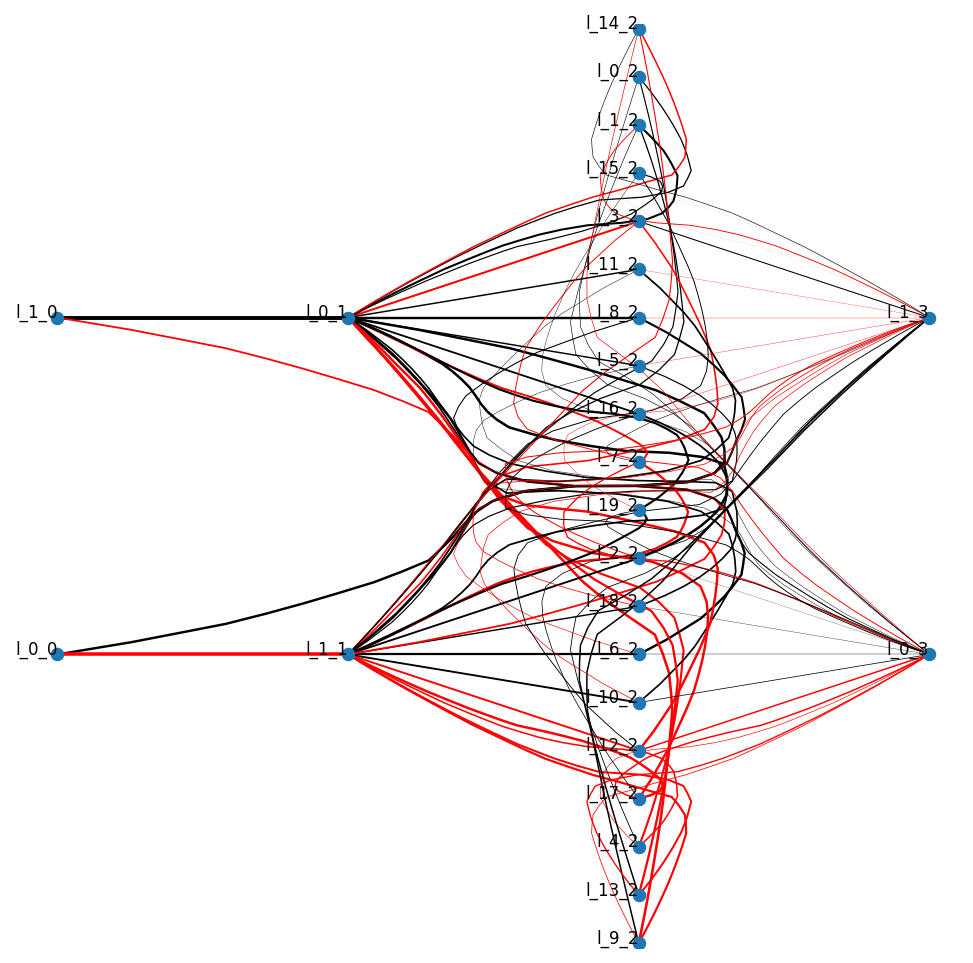

In [ ]:
x = np.array(list(pos.values())) # gets the positions
adj = nx.to_scipy_sparse_array(G).tocoo() #makes adjacency matrix
weights = adj.data #gets the weigths

# Extract edges from embedding and adjacency matrix
edges = np.stack([x[adj.row], x[adj.col]], axis=1) #makes edges based on node positioning

# Compute FDEB
edges_fdeb = fdeb(edges)

fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Gets correct colors and line widths
for edge, weight in zip(edges_fdeb, weights):
    if weight >= 0:
      line = collections.LineCollection([edge], color="black", linewidth=weight/2, alpha=1) #
    else:
      line = collections.LineCollection([edge], color="red", linewidth=weight/2, alpha=1)
    ax.add_collection(line)



# Plot nodes
ax.scatter(x[:, 0], x[:, 1], c="tab:blue", s=30, zorder=3)

# Add labels
for key, values in pos.items():
    ax.text(values[0], values[1], str(key), fontsize=8, ha='right')

# Adjust plot limits
ax.set_xlim(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1)
ax.set_ylim(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1)

# Hide axes
ax.axis('off')

plt.show()

### ChatGPTs attempt at making FDEB useful

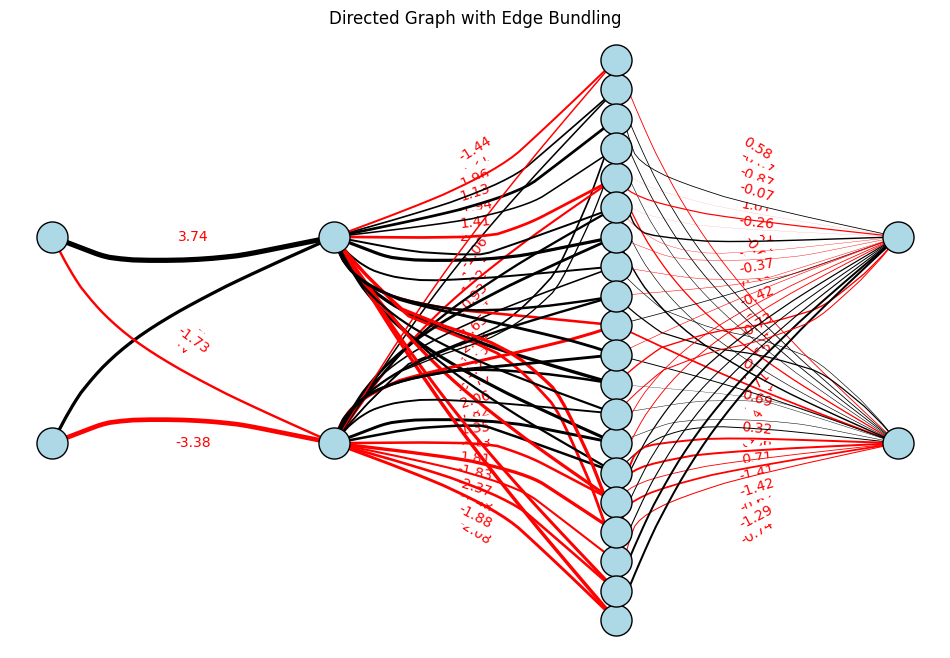

In [ ]:
# Function to preprocess edges for edge bundling
# essentially, its try to add a point in the middle of the edges, which will
# cause for better attraction, it was also trying (and failing) to factor in weights
def preprocess_edges(edges, node_positions):
    bundled_edges = []
    bundled_weights = []
    for target_node in G.nodes():
        incoming_edges = [edge for edge in edges if edge[1] == target_node] #gets edges that have the target node as the dest node
        if len(incoming_edges) <= 1:
            continue

        # Calculate the mean position of the source nodes
        mean_position = np.mean([pos[edge[0]] for edge in incoming_edges], axis=0) # averages the positions of the source nodes

        # Move control points towards the mean position
        for edge in incoming_edges:
            source = pos[edge[0]]
            target = pos[edge[1]]
            control_points = [source, mean_position, target]
            bundled_edges.append(control_points) # attempts to use those three points in the FDEB along with the weights
            bundled_weights.append(G[edge[0]][edge[1]]['weight'])  # makes an array of the weights

    return np.array(bundled_edges), np.array(bundled_weights)

# Preprocess edges for bundling
edges = list(G.edges())
bundled_edges, bundled_weights = preprocess_edges(edges, pos)

# Perform edge bundling with FDEB
edges_fdeb = fdeb(bundled_edges) #, bundled_weights) #took this off because the linear algebra math wasn't mathing, probably fixable tbh

plt.figure(figsize=(12, 8))

# adds edge colors and weights
for edge, weight in zip(edges_fdeb, bundled_weights):
    if weight>=0:
      line = collections.LineCollection([edge], color='black', linewidth=abs(weight))
    else:
      line = collections.LineCollection([edge], color='red', linewidth=abs(weight))
    plt.gca().add_collection(line)

# Plot nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', edgecolors='black', linewidths=1)

# Plot edges without labels
nx.draw_networkx_edges(G, pos, edgelist=[], alpha=0.5)

# Display edge weights
labels = {(u, v) : round(G[u][v]['weight'].numpy(), 2) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_color='red')

plt.title('Directed Graph with Edge Bundling')
plt.axis('off')
plt.show()


### NetGraph attempt at bundling

In [ ]:
#seems to bundle based on community, so make each column it's own community
node_to_community = {}
for node in G.nodes():
  node_to_community[node] = int(node.split('_')[2])

In [ ]:
#adds node color based on community
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

/usr/local/lib/python3.10/dist-packages/netgraph/_edge_layout.py:978: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/netgraph/_utils.py:360: RuntimeWarning:

invalid value encountered in divide



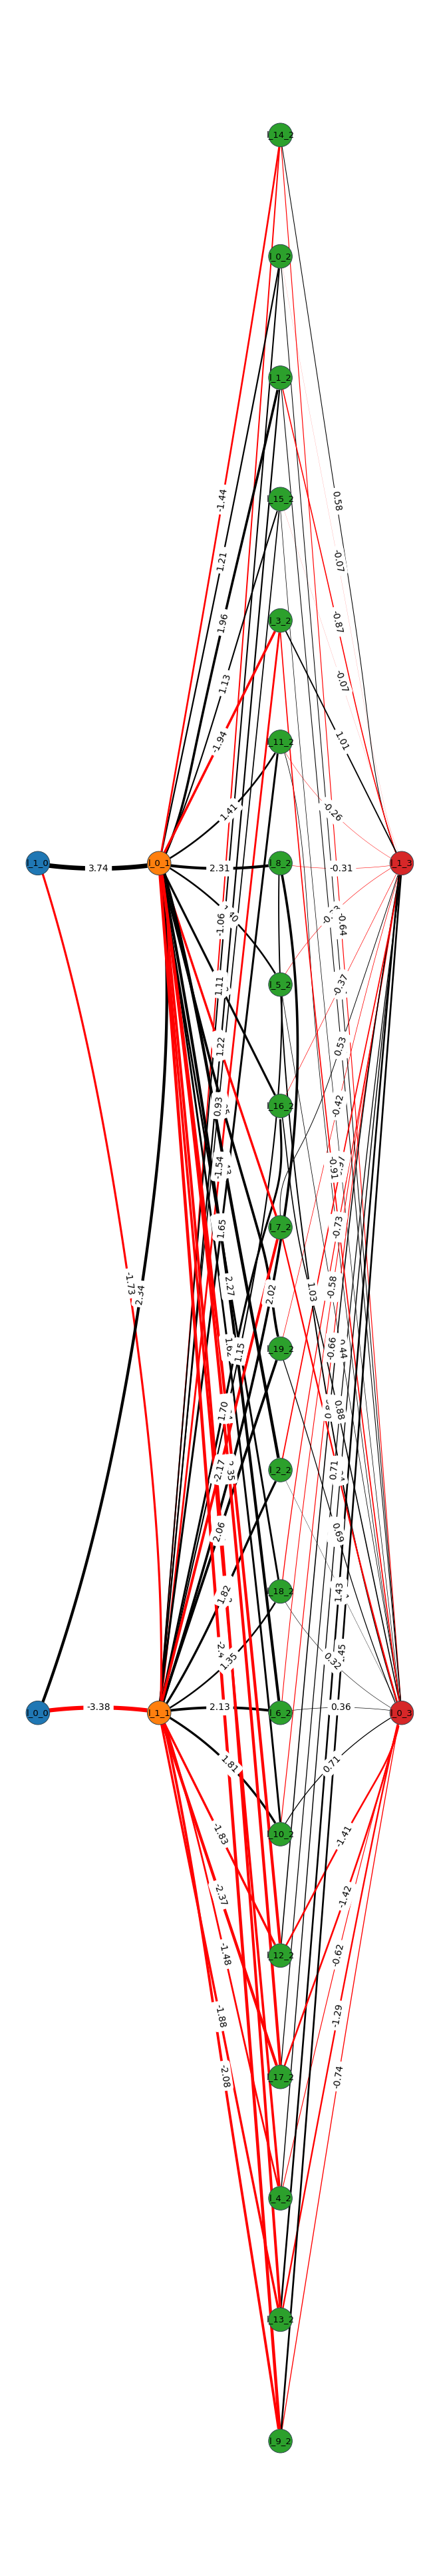

In [ ]:
# A dictionary where key = edge and val = np.array(weight)
width = {edge: np.array(G[edge[0]][edge[1]]['weight']).item() for edge in G.edges()}

edge_colors = {edge: 'black' if np.array(G[edge[0]][edge[1]]['weight']).item() >= 0 else 'red' for edge in G.edges()}

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

pos2 = {} # Makes a dictionary where key = node and val = np.array(x, y)
for node, val in pos.items():
  pos2[node]= np.array([val[0], val[1]])

# Use the edge_layout option to bundle the edges together
fig, ax = plt.subplots(figsize = (15, 50))
Gbundle = Graph(G,
      node_color=node_color,
      node_size = 10,
      edge_width = width,
      edge_color = edge_colors,
      node_layout=pos2,
      edge_labels = edge_labels,
      # node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', # this is where bundling is made possible,
      edge_alpha = 1,
      node_labels = True,
      ax=ax,
)
# Gbundle.node_positions =
plt.show()

### My current hopeless last ditch effort at edge bundling

In [ ]:
#create midpoints between columns with white nodes. the y val should be based on the output node
import networkx as nx


# Assuming you have Ws defined earlier, and Ws[-1] contains W1 and W2
# Define the weight matrices (taken from Ws[-1])
weights = model.weights
# Create a directed graph
G = nx.MultiDiGraph()

pos = {}
# Add nodes for first column
col = 0
print(len(weights))
i = 0
z = 0

maxRow = sorted_groups['group_index'].max() + 2
mdpt_weights = {}

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    if source_node not in pos.keys():
      sourceColumn = sorted_groups.loc[source_node]['column']
      colLength = (int(sorted_groups[sorted_groups['column'] \
        == sourceColumn]['group_index'].max()) + 2)
      currRow = (sourceRow + 1)
      pos[source_node] = (col, (maxRow//colLength * currRow) * 5)

    for row in range(w.shape[1]):
      edge_list = []
      midpt = 'mp_' + str(row) + '_' + str(col + 1)
      dest_node = 'l_' + str(row) + '_' + str(col + 1)
      if not G.has_edge(source_node, midpt):
        G.add_edge(source_node, midpt, weight = np.array(w[sourceRow][row]).item())
      dest_node = 'l_' + str(row) + '_' + str(col + 1)
      if dest_node not in pos.keys():
        destColumn = sorted_groups.loc[dest_node]['column']
        colLength = (int(sorted_groups[sorted_groups['column'] \
          == destColumn]['group_index'].max()) + 2)
        currRow = sorted_groups.loc[dest_node]['group_index'] + 1
        pos[dest_node] = (col + 1, (maxRow//colLength * currRow) * 5)

        #midpoint creation
        pos[midpt] = (col + .5, (maxRow//colLength * currRow) * 5)

      edge_weight = np.array(w[sourceRow][row]).item()
      mdpt_weights.setdefault(midpt, (0, 0))

      positive_weight = mdpt_weights[midpt][0]
      negative_weight = mdpt_weights[midpt][1]

      if edge_weight >= 0:
        positive_weight += edge_weight
      else:
        negative_weight += edge_weight
      mdpt_weights[midpt] = (positive_weight, negative_weight)

  i += 2
  col += 1

for key, val in mdpt_weights.items():
  dest_node = 'l_' + key.split('_')[1] + '_' + key.split('_')[2]
  if val[0] != 0:
    G.add_edge(key, dest_node, weight = float(val[0])) # positive weight
  if val[1] != 0:
    G.add_edge(key, dest_node, weight = float(val[1])) # negative weight

6


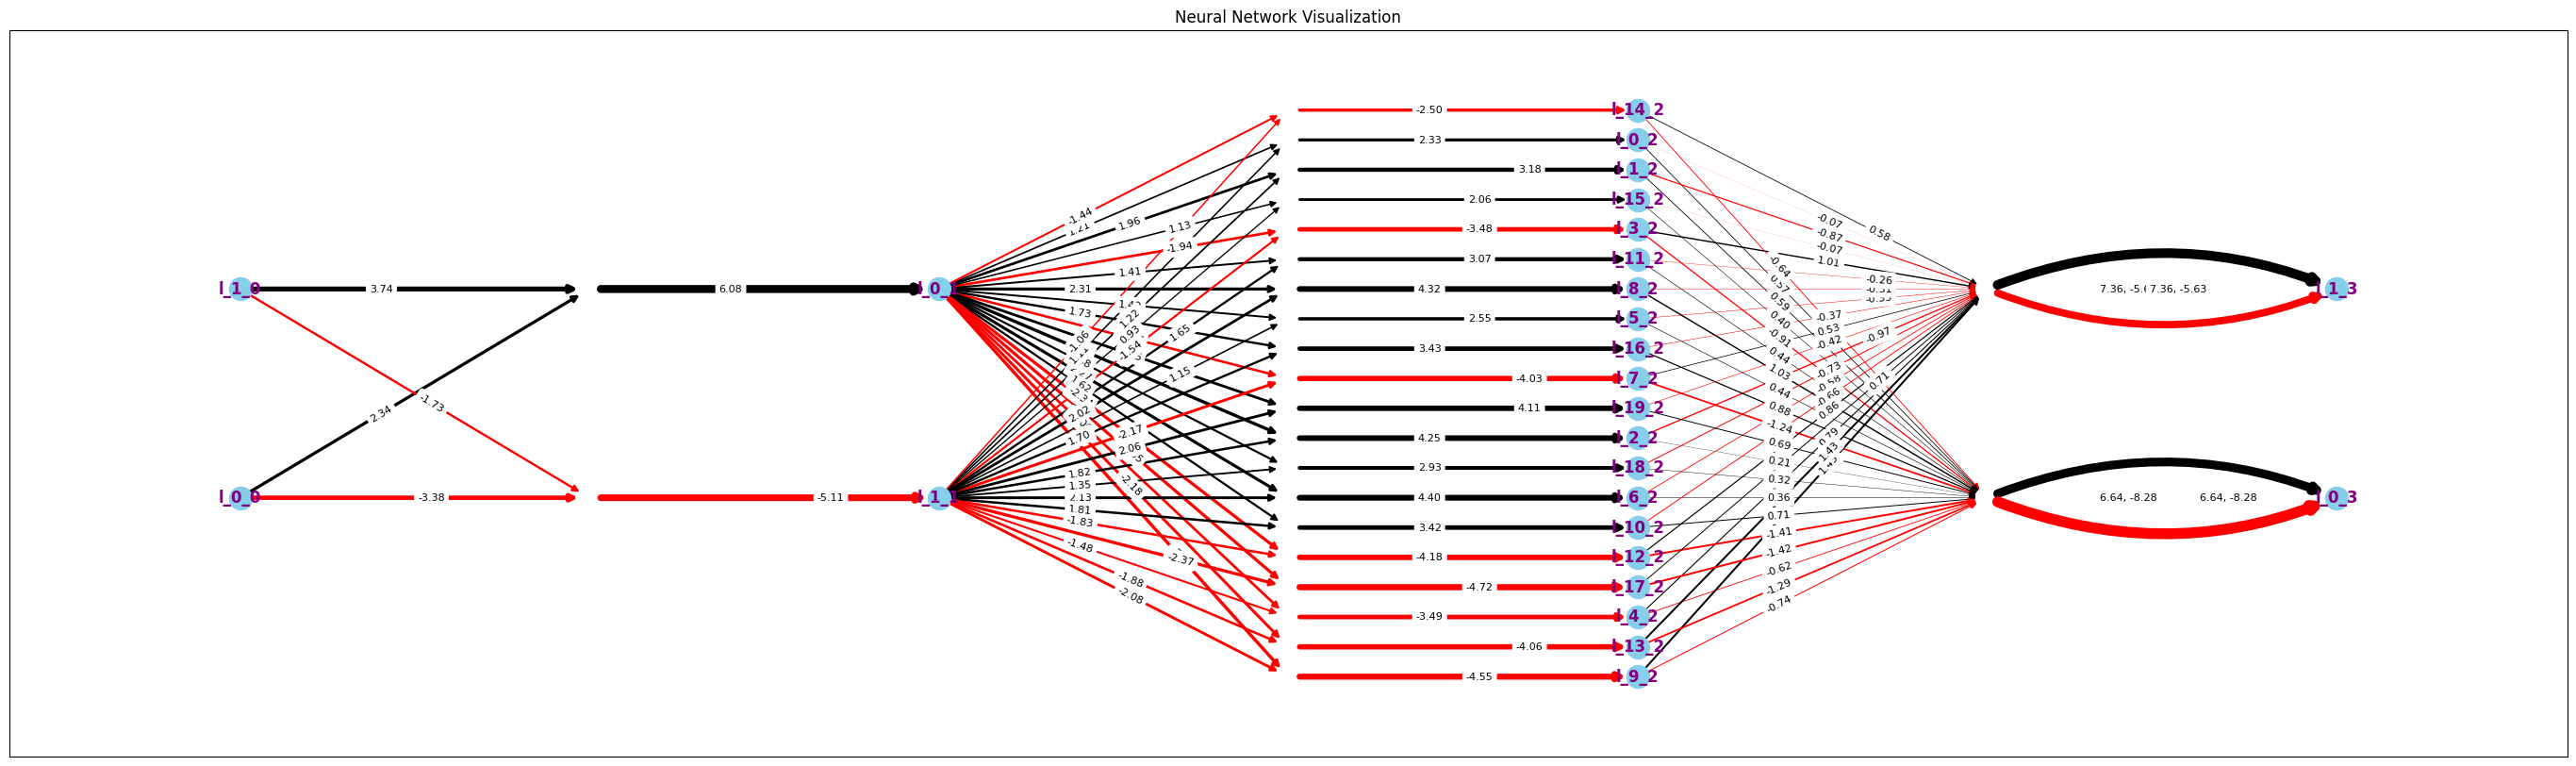

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

edge_colors = ['black' if G[u][v][key]['weight'] >= 0 else 'red' for u, v, key in G.edges(keys=True)] # Edge colors based on weight
width = [abs(G[u][v][key]['weight']) for u, v, key in G.edges(keys=True)] # Edge width based on weight
# node_colors = ['white' if node[:2] == 'mp' else 'skyblue' for node in G.nodes()] # Gives mp nodes a white color and everything else a skyblue
node_list = [node for node in G.nodes() if node[:2] != 'mp']
connectionStyle = []

for u, v, key in G.edges(keys=True): # if more than two edges adds a curve
  if u.split('_')[0] != 'mp':
    connectionStyle.append('arc3')
  else:
    try:
      if G[u][v][0]['weight'] != 0 and G[u][v][1]['weight'] != 0:
        if key == 0:
          connectionStyle.append(f'arc3,rad={-0.20}')
        else:
          connectionStyle.append(f'arc3,rad={0.20}')
    except KeyError as e:
      connectionStyle.append('arc3')

plt.figure(figsize=(35, 10))


nx.draw_networkx_nodes(G, pos=pos, nodelist=node_list, node_size=300, node_color='skyblue')

label_pos = {}
for node, coords in pos.items():
  if node.split('_')[0] != 'mp':
    label_pos[node] = np.array([coords[0], coords[1]]) # if not mp gives lable
  else:
    label_pos[node] = np.array([-55000, -550000]) # if mp throws the labels way out there because we don't want to see them

nx.draw_networkx_labels(G, label_pos, font_size=12, font_color='purple', font_weight='bold')



# Draw edges individually with specified connection styles (adds a curve if more than two edges per two nodes)
for (u, v, key), color, style, w in zip(G.edges(keys=True), edge_colors, connectionStyle, width):
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v, key)],
        edge_color=color,
        connectionstyle=style,
        width=w,
        arrows=True
    )

# Draw edge labels
edge_labels = {}
for u, v, key in G.edges(keys=True):
  if u.split('_')[0] != 'mp': # if not source node isn't a mp then just give typical weights
    edge_labels[(u, v, key)] = f"{G[u][v][key]['weight']:.2f}"
  else:
    try:
      if G[u][v][0]['weight'] != 0 and G[u][v][1]['weight'] != 0:
        # if both outgoing weights of positive and negative give Positive, negative
        edge_labels[(u, v, key)] = f"{G[u][v][0]['weight']:.2f}, {G[u][v][1]['weight']:.2f}"
    except KeyError as e:
      #if only one key give a singular weight
      edge_labels[(u, v, key)] = f"{G[u][v][key]['weight']:.2f}"

i = 0
for u, v, key in G.edges(keys=True):
    specific_edge_labels = {(u, v, key): edge_labels[(u, v, key)]}
    row = int(u.split('_')[1])
    #tries to evenly distribute edge labels positions among all edges
    if i % 2 == 0:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=specific_edge_labels, font_color='black', font_size=8, label_pos = .4)
    elif i % 3 == 0:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=specific_edge_labels, font_color='black', font_size=8, label_pos = .7)
    else:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=specific_edge_labels, font_color='black', font_size=8, label_pos = 0.55)
    i += 1


plt.title('Neural Network Visualization')
plt.axis('on')
plt.margins(0.1)
plt.show()
